# Copy and Reference In Python

In previous editions of The Analyst, we covered Python's data types and string manipulation with regular expressions. This article delves into data referencing and copying in Python, emphasizing the importance of distinguishing between them to avoid unintended code outcomes. Additionally, we provide a brief overview of computer memory.


Consider the below snippet, where we initialize a list of tickers **list_a**. Suppose we are interested in making changes to the list, but also want to make a copy of it in case we need to revert the list back to the original state. Does the below create a copy?

In [ ]:
list_a = ["MSFT", "AAPL", "ZSP"]

list_b = list_a

print(list_a)
print(list_b)

['MSFT', 'AAPL', 'ZSP']
['MSFT', 'AAPL', 'ZSP']


At first glance, through the line **list_b = list_a**, list_b seems to have taken on the value of list_a. As such, printing both list_a and list_b gets us the same list of ["MSFT", "AAPL", "ZSP"].

Now let's make some changes to list_b.

In [ ]:
list_b.append("GOOGL")
print(list_b)

['MSFT', 'AAPL', 'ZSP', 'GOOGL']


After adding "GOOGL" to list_b, it naturally contains "MSFT", "AAPL", "ZSP" and "GOOGL". The curious part is what happens to list_a.

In [ ]:
print(list_a)

['MSFT', 'AAPL', 'ZSP', 'GOOGL']


Clearly, the copy did not work as intended, and now we are left without the original list of ["MSFT", "AAPL", "ZSP"]. Why was "GOOGL" added to list_a when the modification was done to list_b and not to list_a?

The tricky part was the seemingly innocent line **list_b = list_a** at the beginning. Many new programmers might implicitly assume that it means list_b is equal to list_a, or that it takes on the value of list_a (i.e. as a copy), and that the two should exist independently going forward. This is not the case.

This can be confusing to a lot of new programmers, who likely started Python with some variation of the below lines of code:

In [ ]:
a = 3
b = a

b = b + 1
print("a =", a)
print("b =", b)

a = 3
b = 4


That the above lines lead to b = 4 and a = 3 is so logical that suggesting the contrary goes against basic algebra. Indeed, adding a 1 to **b** should have no impact to **a**, and there was no arithmetic operation after b = b + 1 that concerns **a**. Why, then, can we not extrapolate such a basic train of logic to list_b and list_a?

The key to understanding this lies in the concept of memory addresses.



# Computer Architecture and Memory:

We will start by exploring the basics of the memory hierarchy in modern computers, providing context for memory addresses and their relevance to Python programming. In computer systems, memory encompasses physical devices for temporary or permanent data storage. Below is a hierarchy of the different types.

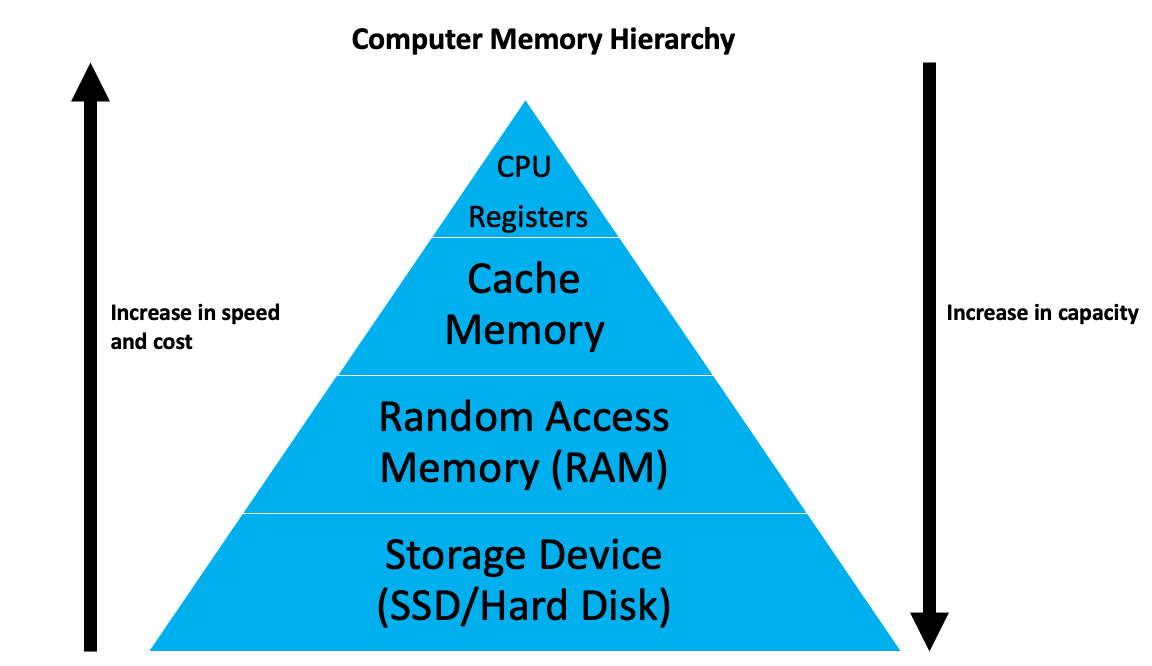

At the top of the pyramid, the Central Processing Unit (CPU) registers are the fastest and are responsible for performing computations. However, they are small and very expensive. As such, the typical process involves the CPU loading data from the main memory (RAM), which can store much more data, before performing computations. The RAM is much faster than the SSD and hard drives, but cannot replace disk storage as it only temporarily stores data - unlike disks, it loses data when the computer powers off.

The RAM will be the topic of focus. When a Python program is executed, the CPU interacts with RAM for data access and storage in contiguous memory addresses. Memory addresses are relied upon as identifiers to refer to specific locations on RAM. A good way to visualize this is to think of RAM as a chest with multiple drawers, each identified by a unique memory address.

Memory addresses are represented using bits, where a bit is a binary number that can be 1 or 0. Binary, of course, is at the heart of computer science and is the language of machine code. Below shows several 8-bit binary numbers and their decimal equivalents (in computing, the fundamental storage unit is one byte. One byte is equal to 8 bits).

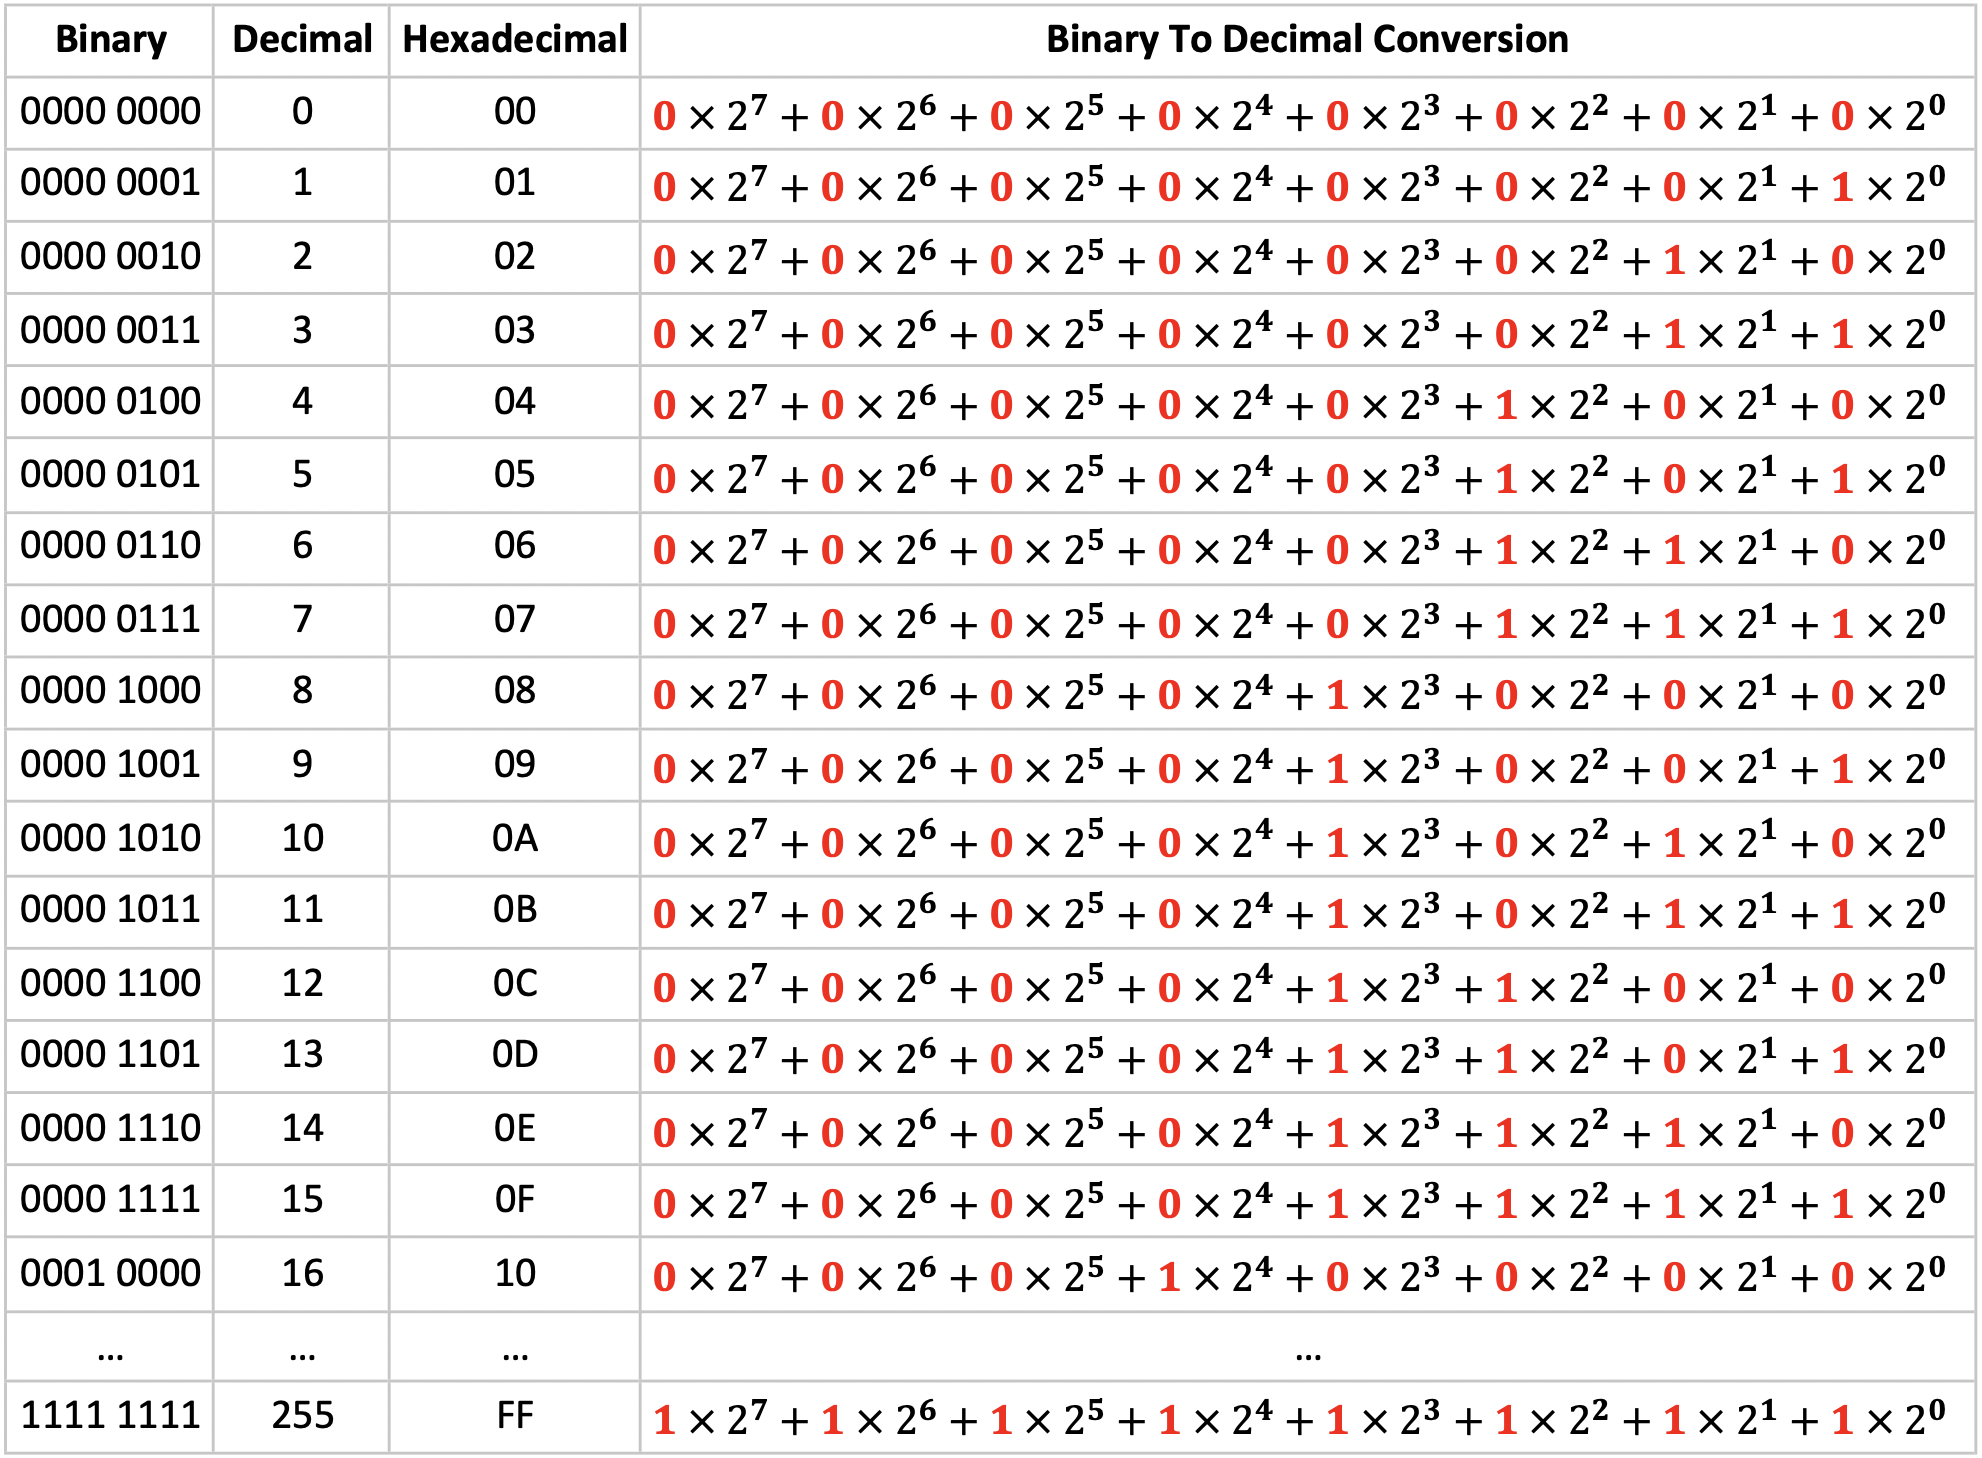

Binary numbers become rapidly less readable as the number of bits grow. Software engineers often represent binary numbers using **hexadecimals** (also shown above), a system that uses sixteen unique symbols, where "0-9" represents their decimal counterparts, while "A-F" represents 10-15. Hexadecimals are the standard format for memory addresses.


Why does all this matter? **Because the equal sign in Python does not assign values, it assigns memory addresses!**.

Returning to the earlier example, a = 3 **does not mean that a is equal to 3**. Rather, the integer 3's memory address (reference) was assigned to the variable a.

In the line **b = a, b** **references** the memory address of 3, the same way that **a** references the memory address of 3. Because integers are immutable (refer to Hashing In Python for clarity), Python shares the memory address to optimize memory usage, rather than create another integer 3 on RAM. In **b = b + 1**, **b**'s reference is updated to the memory address of a newly created integer 4. The variable **a**, meanwhile, **continues to point to integer 3's memory address**. This can be verified using Python's id() method. See diagrams below for clarification.

In [ ]:
a = 3
b = a

print("Before")
print("Memory address of a =", hex(id(a)))
print("Memory address of b =", hex(id(b)))

b = b + 1
print("\nAfter")
print("Memory address of a =", hex(id(a)))
print("Memory address of b =", hex(id(b)))

Before
Memory address of a = 0x7fcdafc04130
Memory address of b = 0x7fcdafc04130

After
Memory address of a = 0x7fcdafc04130
Memory address of b = 0x7fcdafc04150


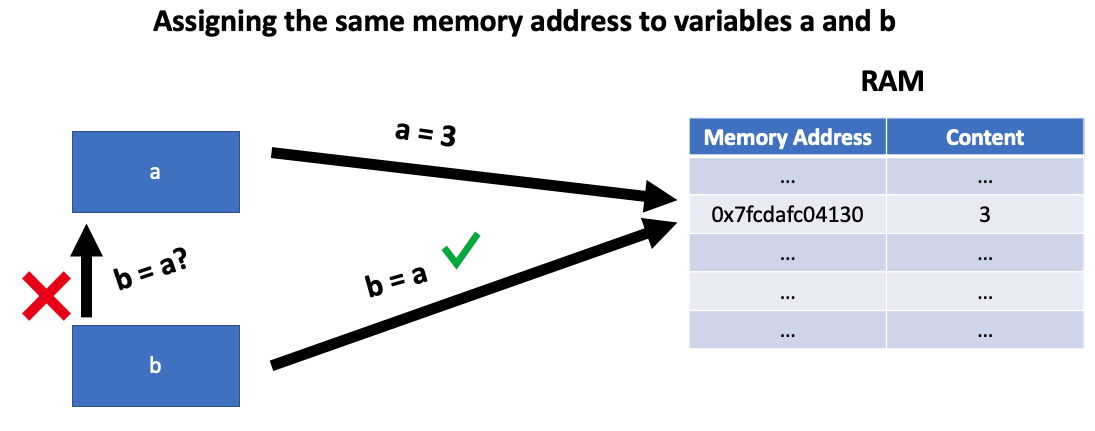

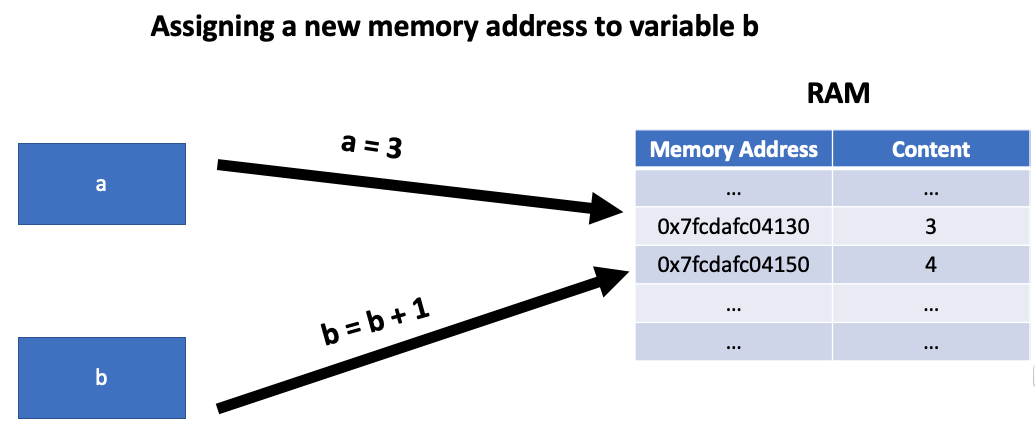

If we keep incrementing the value of b, Python will keep creating new integer objects and reassigning new memory addresses to b, as shown below. The binary equivalent is included for illustration purposes.

In [ ]:
for i in range(5):
  b = b + 1
  print("b : ", b, " Memory address (hex): ", (hex(id(b))), " (binary): ", bin(id(b)))


b :  5  Memory address (hex):  0x7fcdafc04170  (binary):  0b11111111100110110101111110000000100000101110000
b :  6  Memory address (hex):  0x7fcdafc04190  (binary):  0b11111111100110110101111110000000100000110010000
b :  7  Memory address (hex):  0x7fcdafc041b0  (binary):  0b11111111100110110101111110000000100000110110000
b :  8  Memory address (hex):  0x7fcdafc041d0  (binary):  0b11111111100110110101111110000000100000111010000
b :  9  Memory address (hex):  0x7fcdafc041f0  (binary):  0b11111111100110110101111110000000100000111110000


Astute readers may observe the memory addresses incrementing by 0x20 in hex, equivalent to 32 bits. This is because the size of an integer in standard Python implemntation is 4 bytes (32 bits).

# Revisiting Our Example


With a stronger understanding of memory addresses and referencing, let's revisit the list example. In the line **list_b = list_a**, we were in fact pointing list_b to the **memory address** of list_a. In this case, we can see that list_a and list_b have the same memory address even after adding "GOOGL" to the list.

In [ ]:
list_a = ["MSFT", "AAPL", "ZSP"]

list_b = list_a

print('Before adding "GOOGL" to the list')
print(hex(id(list_a)))
print(hex(id(list_b)))

list_b.append("GOOGL")

print('\nAfter adding "GOOGL" to the list')
print(hex(id(list_a)))
print(hex(id(list_b)))

Before adding "GOOGL" to the list
0x7fcd63a37380
0x7fcd63a37380

After adding "GOOGL" to the list
0x7fcd63a37380
0x7fcd63a37380


When we added "GOOGL" to **list_b**, we were in fact modifying the list that was stored in the memory address pointed to by **list_b**. And since we did not reassign the reference for **list_a**, both list_a and list_b continued to point to the same memory address.

The takeaway is that simple assignment does **not** create copies. This is a critical concept and will save a lot of time debugging code as programs get more complex.

To create copies in Python, we can import the copy module and call its copy() method, which creates a new object behind the scenes, and assign its memory address to **list_b**. From below, we can see that changes to **list_b** no longer impact **list_a**.




In [ ]:
import copy as cp

list_a = ["MSFT", "AAPL", "ZSP"]

list_b = cp.copy(list_a)
list_b.append("GOOGL")

print("Memory address: ", hex(id(list_a)), " Contents: ", list_a)
print("Memory address: ", hex(id(list_b)), " Contents: ", list_b)

Memory address:  0x7b855a2f7440  Contents:  ['MSFT', 'AAPL', 'ZSP']
Memory address:  0x7b855a304340  Contents:  ['MSFT', 'AAPL', 'ZSP', 'GOOGL']


# Shallow Copy and Deep Copy

The above is called a **shallow copy**, which is very useful but might not work as intended when dealing with nested objects, where the object being copied contains inner references to mutable objects (i.e. a list of lists). For example, what happens if **list_a** instead contained **two lists** of tickers, and we want to make changes to one of the "inner lists" by adding the ticker "NVDA"? A shallow copy would copy the **outer** reference, but the **inner** references remain the same.


In [ ]:
list_a = [["MSFT", "AAPL"], ["ZSP", "GOOGL"]]

list_b = cp.copy(list_a)

list_b[0].append("NVDA")

#list_b is a copy of list_a, containing a different memory address
print("Memory addresses of list_a and list_b are different")
print("list_a address: ", hex(id(list_a)))
print("list_b address: ", hex(id(list_b)))

#However, inner references remained the same due to cp.copy() being a Shallow Copy
print("\nMemory addresses of first list in list_a and list_b are the same")
print("list_a[0] memory address: ", hex(id(list_a[0])))
print("list_b[0] memory address: ", hex(id(list_b[0])))

#Result: making changes to list_b still impacted list_a
print("\nThe copy did not work as intended as list_a and list_b have the same content")
print("list_a contents: ", list_a)
print("list_b contents: ", list_b)


Memory addresses of list_a and list_b are different
list_a address:  0x7b855a2da7c0
list_b address:  0x7b855a304a40

Memory addresses of first list in list_a and list_b are the same
list_a[0] memory address:  0x7b855a32ef00
list_b[0] memory address:  0x7b855a32ef00

The copy did not work as intended as list_a and list_b have the same content
list_a contents:  [['MSFT', 'AAPL', 'NVDA'], ['ZSP', 'GOOGL']]
list_b contents:  [['MSFT', 'AAPL', 'NVDA'], ['ZSP', 'GOOGL']]


A **deep copy** can be invoked through the copy module's **deepcopy()** method. As the name suggests, it recursively creates copies of an object as well as any nested references. Below shows the same code but replaces **cp.copy()** with **cp.deepcopy()**.

In [ ]:
list_a = [["MSFT", "AAPL"], ["ZSP", "GOOGL"]]

list_b = cp.deepcopy(list_a)

list_b[0].append("NVDA")

#list_b is a deep copy of list_a, and contains a different memory address
print("Memory addresses of list_a and list_b are different")
print("list_a address: ", hex(id(list_a)))
print("list_b address: ", hex(id(list_b)))

#With Deep Copy, inner references have also changed and memory addresses for constituent lists are also different
print("\nMemory addresses of first list in list_a and list_b are now different")
print("list_a[0] memory address: ", hex(id(list_a[0])))
print("list_b[0] memory address: ", hex(id(list_b[0])))

#Result: making changes to list_b has no impact on list_a
print("\nThe copy now works as intended, list_a and list_b have different content")
print("list_a contents: ", list_a)
print("list_b contents: ", list_b)

Memory addresses of list_a and list_b are different
list_a address:  0x7b855b55e240
list_b address:  0x7b855a304d80

Memory addresses of first list in list_a and list_b are now different
list_a[0] memory address:  0x7b856b7a8980
list_b[0] memory address:  0x7b855a2d95c0

The copy now works as intended, list_a and list_b have different content
list_a contents:  [['MSFT', 'AAPL'], ['ZSP', 'GOOGL']]
list_b contents:  [['MSFT', 'AAPL', 'NVDA'], ['ZSP', 'GOOGL']]


Deep copy is often considered a safer way to copy if the programmer is working with complex data structures and unsure of any possible underlying references. However, it is generally slower than shallow copy, and consumes more memory by making copies of the entire object hierarchy, which might not be necessary sometimes. The choice between the two depends on memory and performance considerations, as well as the programmer's understanding of whether the internal objects need to be changed.


Winfred Lam, CFA, is a Manager at BMO Corporate Treasury responsible for Balance Sheet Management. He is also a graduate student in computer science at the University of Pennsylvania, and a volunteer member of CFA Society Toronto’s Member Communication Committee.